<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 800>

# Final Project 2 - Logistic Regression dan SVM

Kelompok 2:
1. ELSA WULANDARI
2. ANSHARULHAQ AMINSYAH
3. NAFIATUL RISA

# Project Overview

Pada project kali ini membahas tentang penerapan Suvervised Manchine Learning yaitu metode Classification dengan menggunakan algoritma Logistic Regression dan Suport Vector Mancine(SVM).Data yang digunakan dalam project ini adalah dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun. Dataset ini terdiri dari 145460 baris dan 23 kolom yang dapat diakses pada link https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.
Atribut yang menjadi variabel target adalah RainTomorrow yang berisi "No" (tidak terjadi hujan besok) dan "Yes" (terjadi hujan besok 1mm atau lebih).

# Objective

Project ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# Import Required Libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

# Data Loading

In [3]:
df= pd.read_csv('weatherAUS.csv')

df

FileNotFoundError: [Errno 2] No such file or directory: 'weatherAUS.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#Dimension of dataframe
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
145460 baris
23 kolom


In [ ]:
df.index

RangeIndex(start=0, stop=145460, step=1)

In [ ]:
# View column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
# Melihat nilai unique
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom Date
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
--------------------------------------------------------------------------------
Nilai Unique Kolom Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
--------------------------------------------------------------------------------
Nilai Unique Kolom MinTemp
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 1

In [ ]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum() #Check if any column has null values

Jumlah Missing Value tiap column: 


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) #Check duplicate data

Jumlah Duplicate Data  0


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.describe(include="O")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


**Analisis :**

Berdasarkan hasil diatas, ditemukan bahwa:
1. Dimensi data sejumlah 145460 baris dan 23 kolom dengan 16 kolom dengan tipe data float64 dan 7 kolom dengan tipe data object.
2. Kolom terdiri dari 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', dan 'RainTomorrow'.
3. Nilai Unique tiap kolom sejumlah :
| **Column** | **Jumlah Nilai Unique** |
| :------------: | :---------------------: |
| Date | 3436 |
| Location | 49 |
| MinTemp | 389 |
| MaxTem | 505 |
| Rainfall | 681 |
| Evaporation | 358 |
| Sunshine | 145 |
| WindGustDir | 16 |
| WindGustSpeed | 67 |
| WindDir9am | 16 |
| WindDir3pm | 16 |
| WindSpeed9am | 43 |
| WindSpeed3pm | 44 |
| Humidity9am | 101 |
| Humidity3pm | 101 |
| Pressure9am | 546 |
| Pressure3pm | 549 |
| Cloud9am | 10 |
| Cloud3pm | 10 |
| Temp9am | 441 |
| Temp3pm | 502 |
| RainToday | 2 |
| RainTomorrow | 2 |
4. Jumlah missing value tiap kolom adalah :
| **Column** | **Jumlah Missing Value** |
| :------------: | :---------------------: |
| Date | 0 |
| Location | 0 |
| MinTemp | 1485 |
| MaxTem | 1261 |
| Rainfall | 3261 |
| Evaporation | 62790 |
| Sunshine | 69835 |
| WindGustDir | 10326 |
| WindGustSpeed | 10263 |
| WindDir9am | 10566 |
| WindDir3pm | 4228 |
| WindSpeed9am | 1767 |
| WindSpeed3pm | 3062 |
| Humidity9am | 2654 |
| Humidity3pm | 4507 |
| Pressure9am | 15065 |
| Pressure3pm | 15028 |
| Cloud9am | 55888 |
| Cloud3pm | 59358 |
| Temp9am | 1767 |
| Temp3pm | 1767 |
| RainToday | 3261 |
| RainTomorrow | 3267 |
5. Tidak ada duplicate data

# Data Cleaning

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [ ]:
df.drop('Date', axis = 1, inplace = True)

In [ ]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
 numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [ ]:
categorical = [i for i in df.columns if i not in numerical]
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df.duplicated().sum()

0

In [ ]:
df2 = df.drop(df[df['RainTomorrow'].isnull()].index)

In [ ]:
df3 = df2.drop(['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine'], axis=1) 

In [ ]:
print('banyak kolom :', len(df3.columns))
print('kolom :', df3.columns)

banyak kolom : 21
kolom : Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day',
       'Month', 'Year'],
      dtype='object')


In [ ]:
#update numerical
numerical = [i for i in df3.columns if i not in categorical] 
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

In [ ]:
for num_col in numerical:
    df3[num_col].fillna(df3[num_col].median(),inplace=True)

In [ ]:
for cat_col in categorical:
    df3[cat_col].fillna(df3[cat_col].mode()[0],inplace=True)

In [ ]:
df3.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  object 
 17  RainTomorrow   142193 non-nul

In [ ]:
df3 = df3.rename(columns={
    'Location':'Lokasi',
    'MinTemp': 'Suhu_Minimum',
    'MaxTemp': 'Suhu_Maksimum',
    'Rainfall':'Curah_Hujan',
    'WindGustDir':'Arah_Angin',
    'WindGustSpeed':'Kecepatan_Angin',
    'WindDir9am':'Arah_Angin_9Pagi',
    'WindDir3pm':'Arah_Angin_3Sore',
    'WindSpeed9am':'Kecepatan_Angin_9Pagi',
    'WindSpeed3pm':'Kecepatan_Angin_3Sore',
    'Humidity9am':'Kelembaban_9Pagi',
    'Humidity3pm':'Kelembaban_3Sore',
    'Pressure9am':'Tekanan_Udara_9Pagi',
    'Pressure3pm':'Tekanan_Udara_3Sore',
    'Temp9am':'Suhu_9Pagi',
    'Temp3pm':'Suhu_3Sore',
    'RainToday':'Hari_ini_Hujan',
    'RainTomorrow':'Hari_besok_Hujan',
    'Day':'Hari',
    'Month':'Bulan',
    'Year':'Tahun'})

df3.head()



,Lokasi,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,...,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


In [ ]:
df3.describe()

,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembaban_9Pagi,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,16.985681,21.675977,15.715084,6.402544,2012.758926
std,6.388936,7.109617,8.426426,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,6.472206,6.871243,8.798150,3.426506,2.541256
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,31.000000,12.000000,2017.000000


In [ ]:
df3.describe(include="O")

,Lokasi,Arah_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Hari_ini_Hujan,Hari_besok_Hujan
count,142193,142193,142193,142193,142193,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,19110,21406,14441,110738,110316


**Analisis :**

Beberapa proses yang dilakukan di data cleaning:
1. Mendeklarasikan categorical variable dan numerical variable
2. Melihat atribut yang masuk categorical dan numerical
3. Mengganti nama atribut yang semulanya bahasa inggris agar lebih mudah dipahami maka dirubah ke bahasa indonesia
4. Convert Date ke tipe data datetime.



# Exploratory Data Analysis

## Questions : Berapa perbandingan dari target feature?

In [ ]:
df2['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

**Visualizations :**

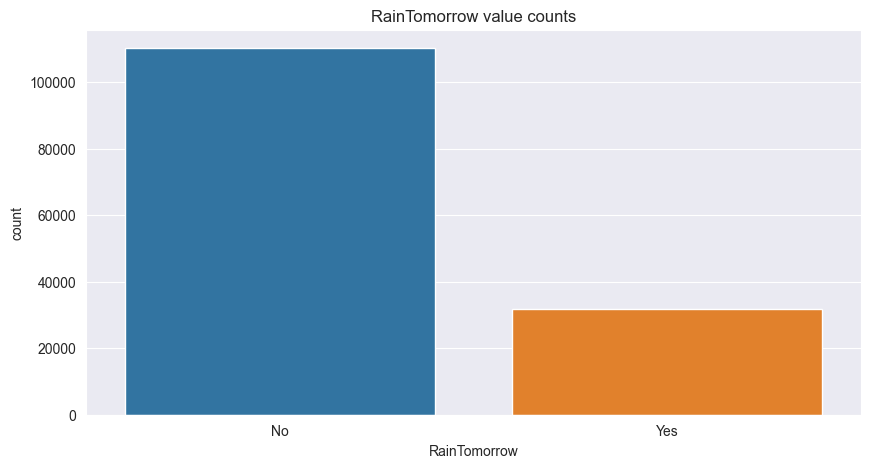

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=df["RainTomorrow"]);

**Analisis :**

Perbandingan data RainTomorrow sangat signifikan. Dimana data 'No' sejumlah 113.583 dan data 'Yes' sejumlah 31.877, yang berarti di Australia tidak sering terjadi hujan.

## Questions : Bagaimana distribusi hujan berdasarkan lokasi di Australia?

**Visualizations :**

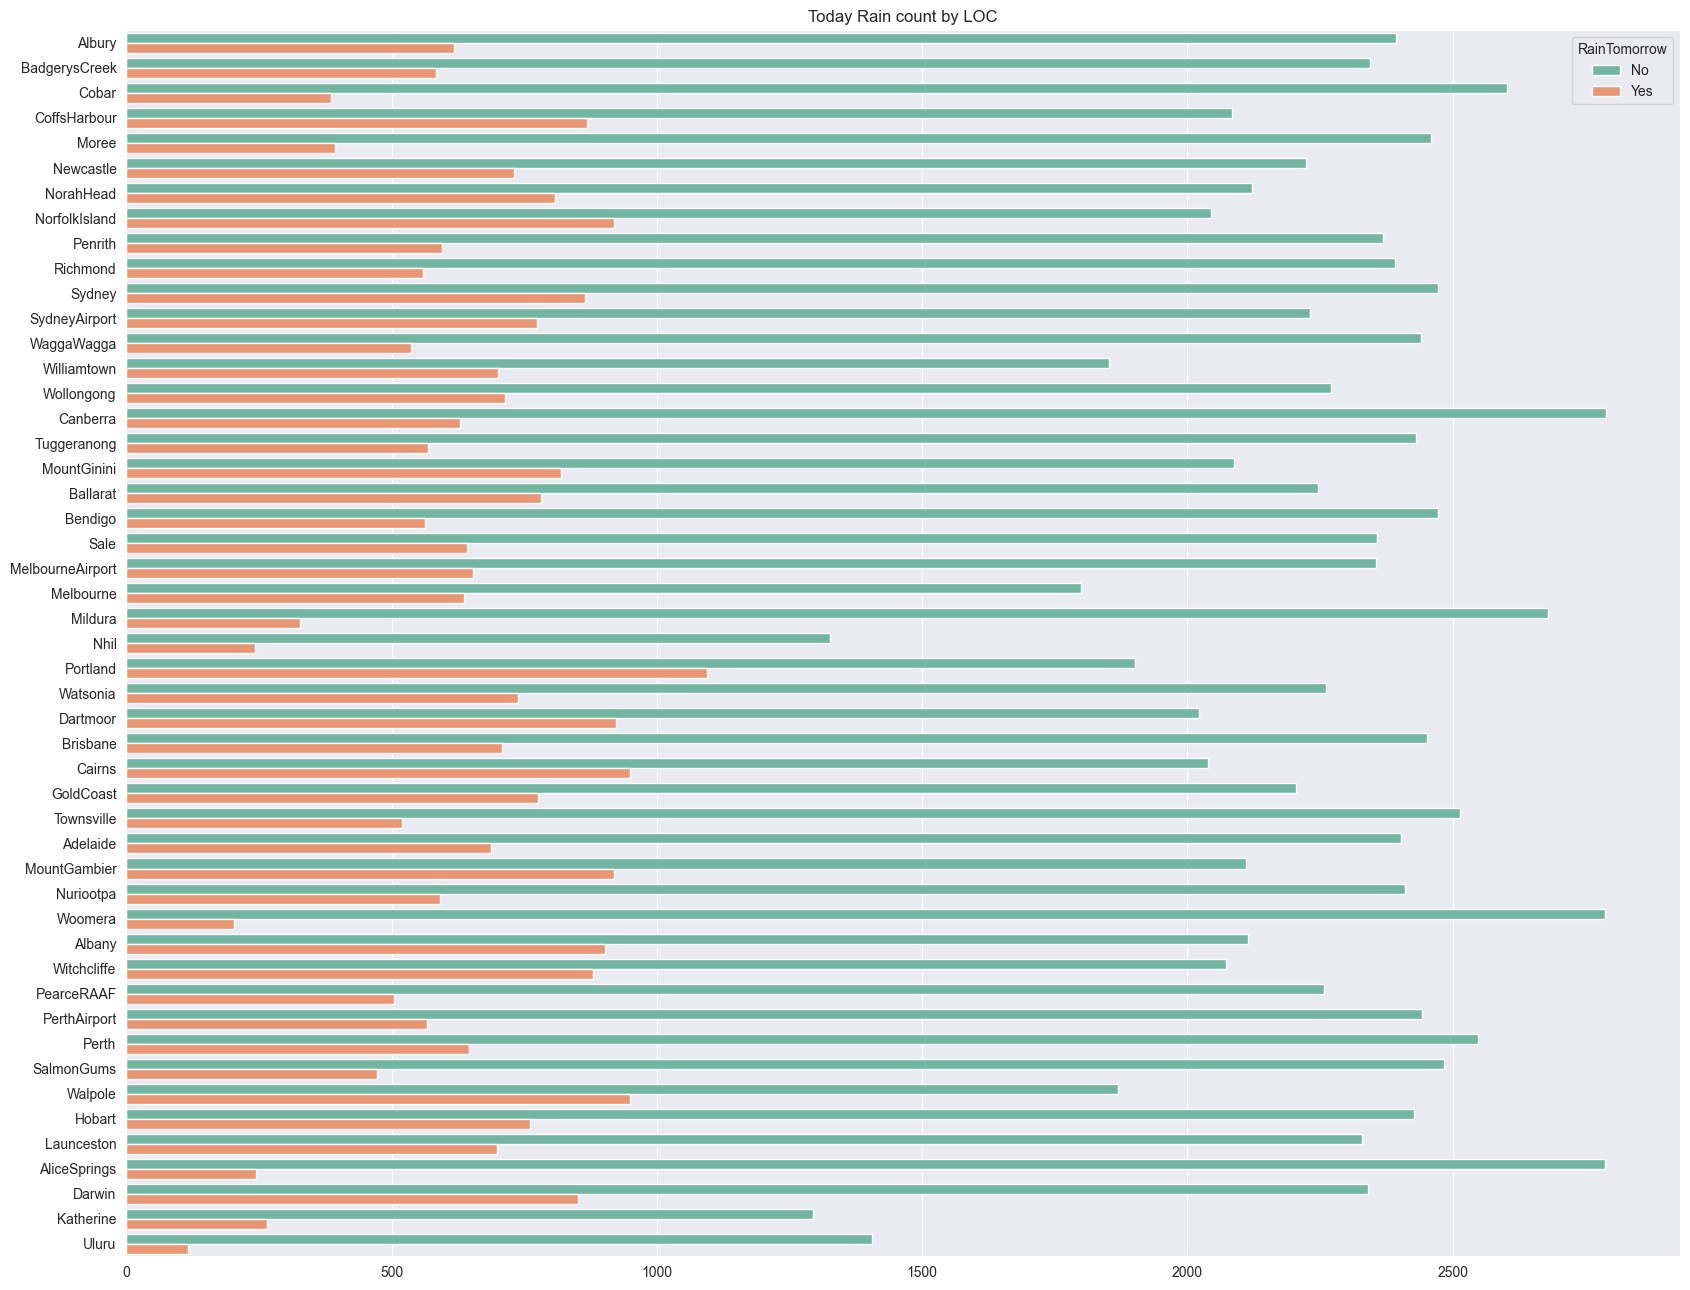

In [ ]:
plt.figure(figsize=(17,13))
sns.countplot(data=df2, y='Location', hue="RainTomorrow", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

**Analisis :**

Daerah yang sering dilanda hujan adalah di Portland. Sedangkan daerah yang tidak sering terjadi hujan adalah di Woomera.

## Questions : Bagaimana  kolerasi antar variabel ?

In [ ]:
df3.corr()

,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembaban_9Pagi,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
Suhu_Minimum,1.000000,0.733894,0.103205,0.172719,0.175126,0.174226,-0.232714,0.006051,-0.424056,-0.433704,0.898129,0.699170,0.001510,-0.203813,0.039139
Suhu_Maksimum,0.733894,1.000000,-0.073862,0.066930,0.014805,0.050309,-0.500179,-0.499633,-0.308861,-0.397168,0.880255,0.969297,-0.000468,-0.164430,0.058295
Curah_Hujan,0.103205,-0.073862,1.000000,0.126684,0.085595,0.056578,0.221110,0.249128,-0.159586,-0.120331,0.011333,-0.077464,0.001116,-0.030623,-0.009394
Kecepatan_Angin,0.172719,0.066930,0.126684,1.000000,0.579196,0.659084,-0.210104,-0.027178,-0.426647,-0.384828,0.146615,0.032827,-0.008865,0.058779,-0.030372
Kecepatan_Angin_9Pagi,0.175126,0.014805,0.085595,0.579196,1.000000,0.512932,-0.269041,-0.031182,-0.214929,-0.164775,0.128765,0.005479,-0.009125,0.050693,-0.021073
Kecepatan_Angin_3Sore,0.174226,0.050309,0.056578,0.659084,0.512932,1.000000,-0.144260,0.015735,-0.277125,-0.239319,0.162190,0.028526,-0.009890,0.060467,-0.032044
Kelembaban_9Pagi,-0.232714,-0.500179,0.221110,-0.210104,-0.269041,-0.144260,1.000000,0.660071,0.131517,0.176081,-0.471274,-0.492952,0.015483,-0.090128,0.010595
Kelembaban_3Sore,0.006051,-0.499633,0.249128,-0.027178,-0.031182,0.015735,0.660071,1.000000,-0.025913,0.048394,-0.217547,-0.555784,0.013030,-0.018315,-0.008562
Tekanan_Udara_9Pagi,-0.424056,-0.308861,-0.159586,-0.426647,-0.214929,-0.277125,0.131517,-0.025913,1.000000,0.959879,-0.397508,-0.265802,-0.020230,0.034666,0.029894
Tekanan_Udara_3Sore,-0.433704,-0.397168,-0.120331,-0.384828,-0.164775,-0.239319,0.176081,0.048394,0.959879,1.000000,-0.441867,-0.360698,-0.020487,0.025695,0.025032


**Visualization :**

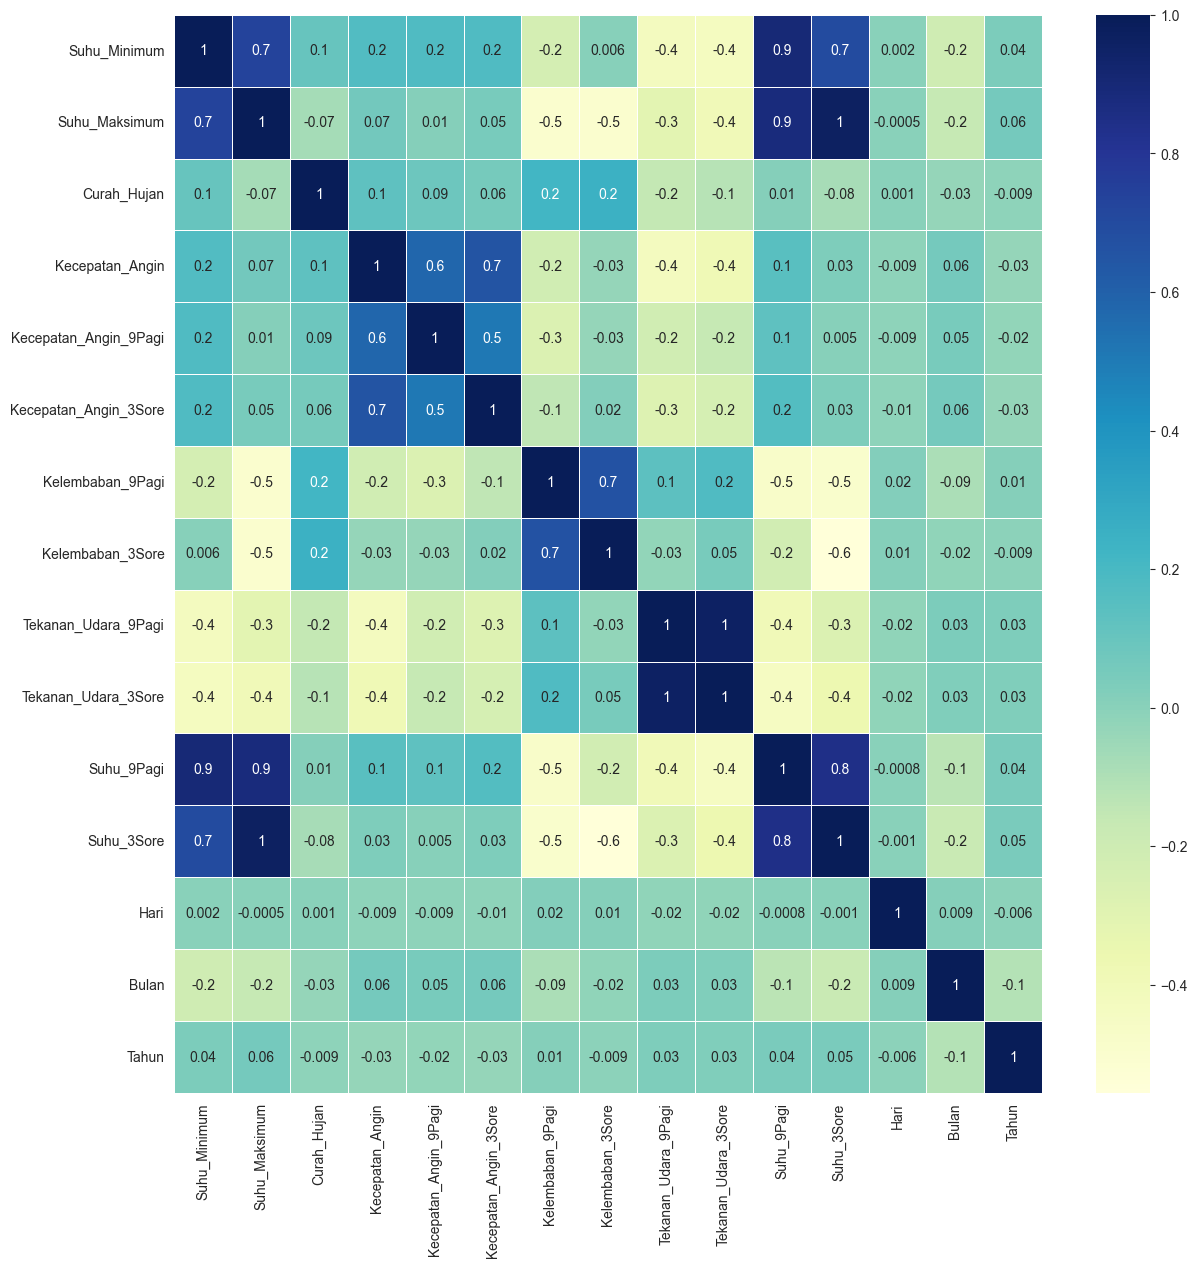

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
cm = sns.heatmap(df3.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

**Analisis :**

Dapat dilihat bahwa terdapat korelasi yang tinggi yaitu antara Tekanan_Udara_3Sore dan Tekanan_Udara_9Pagi, , Suhu_Maksimum dan Suhu_3Sore, Suhu_Minimum dan Suhu_Maksimum, Suhu_9Pagi dan Suhu_Maksimum,karena korelasi yang tinggi ini maka atribut tersebut memiliki informasi yang sama,maka harus ada salah satu yang di drop.Atribut yang akan kami drop adalah Tekanan_Udara_3Sore,Suhu_Maksimum,Suhu_9Pagi.

In [ ]:
df4 = df3.drop(['Tekanan_Udara_3Sore','Suhu_Maksimum','Suhu_9Pagi'],axis = 1)

Setelah atribut di drop maka kita akan cek kembali apakah atribut tersebut telah benar-benar keluar.

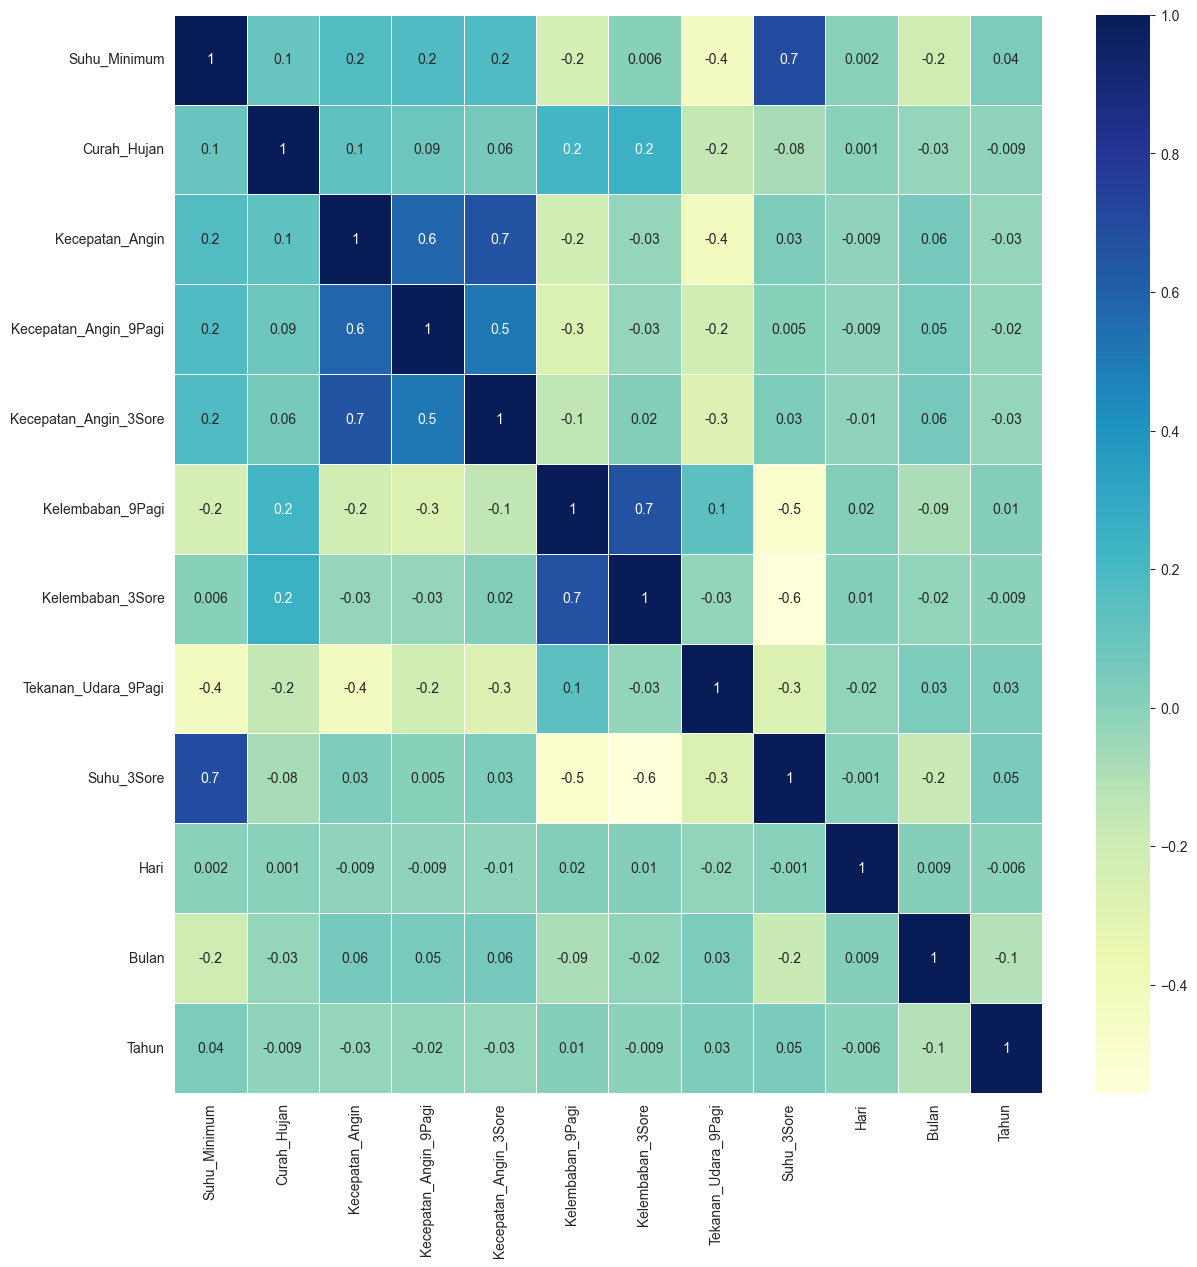

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
cm = sns.heatmap(df4.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

Dapat dilihat bahwa atribut yang telah kita drop sudah tidak ada.

**Analisis :**

- Atribut yang memiliki korelasi tertinggi 4 teratas yaitu atribut Kelembaban_3Sore, Hari_ini_Hujan, Kelembaban_9Pagi, dan Curah_Hujan
- Atribut Lokasi, Arah_Angin, Arah_Angin_3Sore, Tekanan_Udara_9Pagi, Suhu_3Sore, dan Tahun berkorelasi negatif dengan atribut target (Hari_besok_Hujan)


## Questions : Berapa nilai rata-rata artribut yang memiliki korelasi tertinggi berdasarkan Hari_besok_Hujan?

In [ ]:
mean1 = df3[['Kelembaban_3Sore','Hari_besok_Hujan']].groupby('Hari_besok_Hujan').mean().sort_values(by='Kelembaban_3Sore', ascending=True)
mean1

,Kelembaban_3Sore
Hari_besok_Hujan,
No,46.642291
Yes,68.291966


In [ ]:
mean2 = df3[['Kecepatan_Angin','Hari_besok_Hujan']].groupby('Hari_besok_Hujan').mean().sort_values(by='Kecepatan_Angin', ascending=True)
mean2

,Kecepatan_Angin
Hari_besok_Hujan,
No,38.332436
Yes,45.414594


In [ ]:
mean3 = df3[['Tekanan_Udara_9Pagi','Hari_besok_Hujan']].groupby('Hari_besok_Hujan').mean().sort_values(by='Tekanan_Udara_9Pagi', ascending=True)
mean3

,Tekanan_Udara_9Pagi
Hari_besok_Hujan,
Yes,1014.711497
No,1018.497127


In [ ]:
mean4 = df3[['Kelembaban_9Pagi','Hari_besok_Hujan']].groupby('Hari_besok_Hujan').mean().sort_values(by='Kelembaban_9Pagi', ascending=True)
mean4

,Kelembaban_9Pagi
Hari_besok_Hujan,
No,66.260089
Yes,77.849578


**Analisis :**

- Rata-rata atribut Kelembaban_3Sore sekitar 46.64 menunjukan bahwa hari esok tidak akan hujan,rata-rata kelembabab 68.29 menunjukan bahwa besok hujan.
- Rata-rata atribut Kecepatan_Angin sekitar 38.33 kebanyakan menunjukan  besok tidak akan hujan,rata-rata Kecepatan_Angin 45.41 kebanyakan besok hujan.
- Rata-rata atribut Tekanan_Udara_9Pagi sekitar 1018 kebanyakan hari esok tidak akan hujan,jika rata-rata Tekanan_Udara_9Pagi  1014.7 maka kebanyakan besok hujan.
- Rata-rata atribut Kelembaban_9Pagi sekitar 66.26 maka kebanyakan hari esok tidak akan hujan,jika rata-rata Kelembaban_9Pagi 77.84 maka kebanyakan besok hujan.

# Data Preprocessing

In [ ]:
categorical = [i for i in df4.columns if df4[i].dtypes == 'O']
numerical = [i for i in df4.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['Lokasi', 'Arah_Angin', 'Arah_Angin_9Pagi', 'Arah_Angin_3Sore', 'Hari_ini_Hujan', 'Hari_besok_Hujan']
numerical : ['Suhu_Minimum', 'Curah_Hujan', 'Kecepatan_Angin', 'Kecepatan_Angin_9Pagi', 'Kecepatan_Angin_3Sore', 'Kelembaban_9Pagi', 'Kelembaban_3Sore', 'Tekanan_Udara_9Pagi', 'Suhu_3Sore', 'Hari', 'Bulan', 'Tahun']


In [ ]:
df4['Hari_ini_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)
df4['Hari_besok_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)

### Encoding

In [ ]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df4[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [ ]:
df4['Arah_Angin'].replace(encode_data('Arah_Angin'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [ ]:
df4['Arah_Angin_9Pagi'].replace(encode_data('Arah_Angin_9Pagi'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [ ]:
df4['Arah_Angin_3Sore'].replace(encode_data('Arah_Angin_3Sore'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [ ]:
df4['Lokasi'].replace(encode_data('Lokasi'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [ ]:
df4.head()

,Lokasi,Suhu_Minimum,Curah_Hujan,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembaban_9Pagi,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,0,13.4,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,21.8,0,0,1,12,2008
1,0,7.4,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,24.3,0,0,2,12,2008
2,0,12.9,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,23.2,0,0,3,12,2008
3,0,9.2,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,26.5,0,0,4,12,2008
4,0,17.5,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,29.7,0,0,5,12,2008


Dapat dilihat bahwa semua data telah di encoding

## Feature Selection

Disini kami melakukan feature selection menggunakan library ExtraTreesRegressor yaitu mengambil 10 atribut paling penting

In [ ]:
X = df4.drop(['Hari_besok_Hujan'], axis=1)
y = df4['Hari_besok_Hujan']
print(X.shape)
print(y.shape)

(142193, 17)
(142193,)


In [ ]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

### Feature Importance
Feature Importance adalah sebuah peringkat yang mepresentasikan fitur terhadap prediksi suatu model.Feature Importance dengan tingkat kepentingan lebih tinggi memiliki pengaruh lebih besar dari prediksi model.

In [ ]:
etr_model.feature_importances_

array([0.04831665, 0.04731304, 0.03098849, 0.04061323, 0.07022646,
       0.04138638, 0.04214085, 0.04235804, 0.04496255, 0.05276635,
       0.22986197, 0.06420689, 0.04691835, 0.06982774, 0.04439876,
       0.04238688, 0.04132736])

<AxesSubplot:>

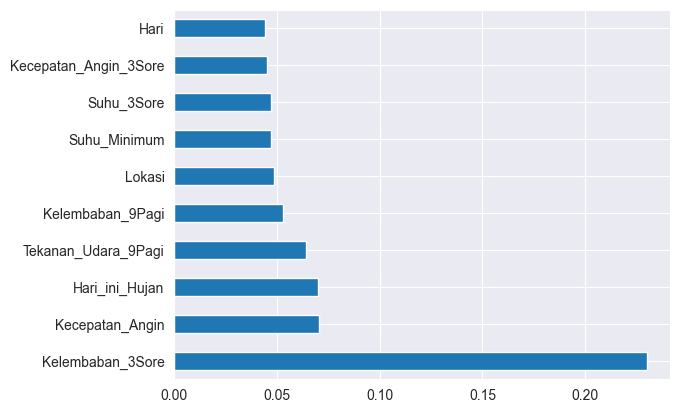

In [ ]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

10 atribut paling penting adalah :
- Hari
- Kecepatan_Angin_3Sore
- Suhu_3Sore
- Suhu_Minimum
- Lokasi
- Kelembaban_9Pagi
- Tekanan_Udara_9Pagi
- Hari_ini_Hujan
- Kecepatan_Angin
- Kelembaban_3Sore

Disini kami mengambil 5 atribut yang berpengaruh sesuai hasil feature importances yaitu Kelembaban_9Pagi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi.

In [ ]:
X_fit = df4[['Kelembaban_9Pagi','Hari_ini_Hujan','Kelembaban_3Sore','Kecepatan_Angin','Tekanan_Udara_9Pagi']]

In [ ]:
X_fit.head()

,Kelembaban_9Pagi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi
0,71.0,0,22.0,44.0,1007.7
1,44.0,0,25.0,44.0,1010.6
2,38.0,0,30.0,46.0,1007.6
3,45.0,0,16.0,24.0,1017.6
4,82.0,0,33.0,41.0,1010.8


In [ ]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Kelembaban_9Pagi     142193 non-null  float64
 1   Hari_ini_Hujan       142193 non-null  int64  
 2   Kelembaban_3Sore     142193 non-null  float64
 3   Kecepatan_Angin      142193 non-null  float64
 4   Tekanan_Udara_9Pagi  142193 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 6.5 MB


## Feature Scaling

In [ ]:
input_variables = [i for i in X_fit.columns if i != 'Hari_besok_Hujan']

Standarisasi data

Standardisasi adalah proses mengubah data sedemikian rupa sehingga mean tiap variabel menjadi sama dengan nol, dan standard deviation tiap variabel adalah satu. Dengan begitu, akan didapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena terdapat outlier atau pecilan pada data.

In [ ]:
scaler = StandardScaler()
X_fit[input_variables] = scaler.fit_transform(X_fit[input_variables])
X_fit.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_7696\1112773166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fit[input_variables] = scaler.fit_transform(X_fit[input_variables])


,Kelembaban_9Pagi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi
0,0.113127,-0.532962,-1.436563,0.310479,-1.474667
1,-1.312997,-0.532962,-1.290451,0.310479,-1.044798
2,-1.629913,-0.532962,-1.046931,0.462679,-1.489490
3,-1.260177,-0.532962,-1.728788,-1.211523,-0.007183
4,0.694140,-0.532962,-0.900818,0.082179,-1.015152


In [ ]:
X_fit.describe()

,Kelembaban_9Pagi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,7.355629e-17,-1.207283e-16,-8.315058e-17,1.778943e-16,-4.470943e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.637049e+00,-5.329623e-01,-2.508053e+00,-2.581325e+00,-5.506540e+00
25%,-6.263446e-01,-5.329623e-01,-7.060020e-01,-6.788223e-01,-6.149289e-01
50%,6.030732e-02,-5.329623e-01,2.455944e-02,-7.002143e-02,-7.183285e-03
75%,7.469593e-01,-5.329623e-01,6.577127e-01,4.626793e-01,6.153854e-01
max,1.644889e+00,1.876305e+00,2.362356e+00,7.235589e+00,3.461414e+00


In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

NameError: name 'pickle' is not defined

## Modelling

In [ ]:
X = df4.drop(['Hari_besok_Hujan'], axis=1)
y = df4['Hari_besok_Hujan']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fit,y, test_size = 0.2, random_state = 10 )

In [ ]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 78.20%
Test set sebesar 19.55%


In [ ]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 113754
Jumlah testing set: 28439


In [ ]:
print("Jumlah hari turunnya hujan: {0} ({1:2.2f}%)".format(len(df4.loc[df4["Hari_besok_Hujan"] == 1]), (len(df4.loc[df4["Hari_besok_Hujan"]==1])/len(df.index))*100.0))
print("Jumlah hari turunnya hujan : {0} ({1:2.2f}%)\n".format(len(df4.loc[df4["Hari_besok_Hujan"] == 0]), (len(df4.loc[df4["Hari_besok_Hujan"] == 0])/len(df.index))*100.0))

print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Jumlah hari turunnya hujan: 31877 (21.91%)
Jumlah hari turunnya hujan : 110316 (75.84%)

Training True: 25575 (22.48%)
Training False: 88179 (77.52%)

Testing True: 6302 (22.16%)
Testing False: 22137 (77.84%)


In [ ]:
# Model
model_lr = LogisticRegression(solver="liblinear", random_state = 42, penalty = 'l1')
model_lr.fit(X_train, y_train)
lr_test_pred = model_lr.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22137
           1       0.71      0.46      0.56      6302

    accuracy                           0.84     28439
   macro avg       0.78      0.70      0.73     28439
weighted avg       0.83      0.84      0.82     28439



In [ ]:
svm_model = svm.SVC(kernel='linear')


In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
svm_test_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22137
           1       0.73      0.43      0.54      6302

    accuracy                           0.84     28439
   macro avg       0.79      0.69      0.72     28439
weighted avg       0.83      0.84      0.82     28439



**Analisis**

Berdasarkan Model yang telah dilakukan menggunakan Logistic Regression serta SVM didapatkan hasil accuracy yang berbeda yang mana pada Logistic Regression memiliki accuracy 0.84 dan SVM 0.83 dalam memprediksi Hari besok hujan

In [ ]:
pickle.dump(model_lr, open('modellg_fp2.pkl','wb'))#Membuat model